# OCR-based gesture recognition system
---

# Abstract

In the abstract of 50-100 words, the author(s) will specify the purpose of the paper, theoretical background, the research problem that is addressed, the approach taken, the research methodology, main findings and contributions relating the original aspects of the paper.

## Keywords
* Gesture recognition with webcam feed
* Optical Character Recognition
* Optical Flow
* Writing symbols in air
* Machine Learning
* Without Kinect
* OpenCV
* Scikit-learn

# Introduction

10% of the paper length

Answer to the question: What is the topic?

The Introduction is the statement of the problem that you investigated. After placing your work in a broader context, you should state the specific question(s) to be answered. This section may also include background information about the problem such as a summary of any research that has been done on the problem in the past and how the present experiment will help to clarify or expand the knowledge in this general area.

Brief introduction, gesture recognition, ocr, opencv, scikit-learn

# Materials and Methods

20% of the paper length

Answer to the question: How I will answer to the first question?

This section explains how and, where relevant, when the experiment was done. The researcher describes the experimental design, the apparatus, methods of gathering data and type of control. If any work was done in a natural habitat, the worker describes the study area, states its location and explains when the work was done. If specimens were collected for study, where and when that material was collected are stated.

# Results

20% of the paper length

Answer to the question: What I observed?

Only the results are presented. No interpretation of the data or conclusions about what the data might mean is given in this section. Data assembled in tables and/or figures should supplement the text and present the data in an easily understandable form.

# Discussion

40% of the paper length

Answer to the question: What is the significance of the results?

The researcher interprets the data in terms of any patterns that were observed, any relationships among experimental variables that are important and any correlations between variables that are discernible. The author should include any explanations of how the results differed from those hypothesized, or how the results were either different from or similar to those of any related experiments performed by other researchers.

# Conclusions

10% of the paper length

The paper will end with a conclusion paragraph in which the author(s) will specify the original results obtained and their possible applications (if any).

Answer to the question : What is the topic?

This section simply states what the researcher thinks the data mean, and, as such, should relate directly back to the problem/question stated in the introduction.

# Acknowledgement

A brief acknowledgement section may be included. 

# References

* Paper should have among 15-25 references.

* 70% of them issued after 2000.

* 50% of references belong to authors that published their papers in ISI journals.

* Optionally 2 references from the Inter-Eng archive of papers or Scientific Bulletin (issued during last two years) (see http://inter-eng.upm.ro/2012/proceedings.html http://scientificbulletin.upm.ro/).

---

## OCR

* [A survey on optical character recognition system](https://www.uni-miskolc.hu/~qgenagyd/publication_references/survey_of_ocr.pdf)

* [OPTICAL CHARACTER RECOGNITION TECHNIQUE ALGORITHMS.](https://www.uni-miskolc.hu/~qgenagyd/publication_references/OPTICAL_CHARACTER_RECOGNITION_TECHNIQUE.pdf)


## Optical-Flow

* [An iterative image registration technique with an application to stereo vision](https://www.uni-miskolc.hu/~qgenagyd/publication_references/lucas_kanade-1981.pdf)

* [Lucas-kanade in a nutshell](https://www.uni-miskolc.hu/~qgenagyd/publication_references/Lucas-Kanade-in-a-nutshell.pdf)


## OpenCV

* [Learning OpenCV: Computer vision with the OpenCV library](https://www.uni-miskolc.hu/~qgenagyd/publication_references/OReilly-Learning%20OpenCV.pdf)


## Scikit-learn

* [Scikit-learn: Machine learning in Python](https://www.uni-miskolc.hu/~qgenagyd/publication_references/Scikit-learn-Machine-Learning-in-Python.pdf)

* [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems](https://www.uni-miskolc.hu/~qgenagyd/publication_references/Hand-on-ML.pdf)

---

# Related Works

## Gesture recognition with the help of Kinect

* [Structured dynamic time warping for continuous hand trajectory gesture recognition](https://www.uni-miskolc.hu/~qgenagyd/publication_references/tang2018.pdf)

* [Gesture recognition using microsoft kinect](https://www.uni-miskolc.hu/~qgenagyd/publication_references/biswas2011gesture.pdf)

* [Visual gesture recognition for text writing in air](https://www.uni-miskolc.hu/~qgenagyd/publication_references/Visual-Gesture-Recognition-for-Text-writing-in-Air.pdf)

* [A new writing experience: Finger writing in the air using a kinect sensor](https://www.uni-miskolc.hu/~qgenagyd/publication_references/Finger-Writing-in-the-Air-Using-a-Kinect-Sensor.pdf)


## Sensor-based gesture recognition with OCR methods

* [A wireless gesture controlled human computer interface](https://www.uni-miskolc.hu/~qgenagyd/publication_references/wireless-gesture.pdf)

* [Hand gesture recognition based on accelerometer sensors](https://www.researchgate.net/publication/238521934_Hand_gesture_recognition_based_on_accelerometer_sensors)


## Other methods for recognizing gestures

* [Recognizing actions by shape-motion prototype trees](https://www.uni-miskolc.hu/~qgenagyd/publication_references/Recognizing%20Actions%20by%20Shape-Motion%20Prototype%20Trees.pdf)

* [Recognizing movement using motion histograms](https://www.uni-miskolc.hu/~qgenagyd/publication_references/RecognizingMovementusingMotionHistograms.pdf)


---
# Testing Jupyter

In [1]:
%matplotlib inline

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Live video annotation

Working with video

Something about OpenCV

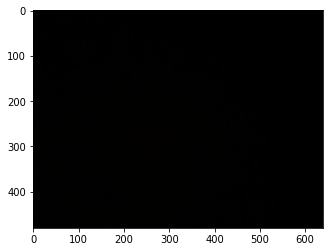

In [3]:
"""
Reading a frame from webcam feed, then showing it in matplot
"""
capture_device = cv2.VideoCapture(0)
ret, frame = capture_device.read()

# OpenCV uses BGR color sets, while matplotlib uses RGB
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

imgplot = plt.imshow(frame_rgb)

capture_device.release()

## Training model

In [4]:
import os

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [5]:
class Model(object):
    """
    Class for Random Forest Classifier model
    """
    def build_ocr_dataset(self, feature_lenght,
                          source_path='./training_datas/ocr_datas/'):
        """
        Building the dataset from files
        :param source_path: The path of the data's folder
        """
        self._X = np.empty((0, feature_lenght), dtype=np.uint8)
        self._y = np.empty((0, ), dtype=np.uint8)
        self._labels = os.listdir(source_path)

        for label in self._labels:
            for file in os.listdir(source_path+label):
                img = cv2.imread(source_path+label+"/"+file, 0)

                feature_vector = np.array(img).flatten()

                self._X = np.append(self._X, [feature_vector], axis=0)
                self._y = np.append(self._y, [label], axis=0)

    def shuffle_dataset_order(self):
        """
        Randomize dataset order
        """
        shuffle_index = np.random.permutation(len(self._y))
        self._X, self._y = self._X[shuffle_index], self._y[shuffle_index]

    def split_dataset(self, test_size, seed):
        """
        Splitting dataset to train and test partitions
        :param test_size: Size of the test partition in percentage
        :param seed: random_state value for splitting
        """
        self._X_train, self._X_test, self._Y_train, self._Y_test = \
            train_test_split(self._X, self._y,
                             test_size=test_size,
                             random_state=seed)
        print("Training dataset size:", len(self._Y_train))
        print("Testing dataset size:", len(self._Y_test))

    def train_classifier(self, clf_args):
        """
        Fitting the training data to the classifier
        :param clf_args: Args for the 42 as a dictionary
        """
        self._clf = RandomForestClassifier(**clf_args)
        self._clf.fit(self._X_train, self._Y_train)

    @property
    def X_train(self):
        return self._X_train

    @property
    def Y_train(self):
        return self._Y_train

    @property
    def X_test(self):
        return self._X_test

    @property
    def Y_test(self):
        return self._Y_test

    @property
    def clf(self):
        return self._clf

## Performance measures

In [6]:
class Performance(object):

    @staticmethod
    def cross_val_accuracy(clf, X, Y, folding=3):
        """
        Calculating Cross-Validation accuracy scores
        """
        scores = cross_val_score(clf,
                                 X, Y,
                                 cv=3, scoring="accuracy")
        return scores

    @staticmethod
    def calc_confusion_matrix(clf, X, Y, folding=3):
        """
        Calculating confusion matrix
        """
        y_pred = cross_val_predict(clf, X, Y, cv=3)
        confusion = confusion_matrix(Y, y_pred)
        return confusion

    @staticmethod
    def normalize_confusion_matrix(conf_mx):
        """
        Normalising confusion matrix
        """
        row_sums = conf_mx.sum(axis=1, keepdims=True)
        norm_conf_mx = conf_mx / row_sums
        np.fill_diagonal(norm_conf_mx, 0)
        return norm_conf_mx

    @staticmethod
    def plot_confusion_matrix(confusion_matrix):
        """
        Plotting confusion matrix
        """
        plt.matshow(confusion_matrix, cmap=plt.cm.gray)
        plt.show()

Training dataset size: 243
Testing dataset size: 105

----Performance Measures----
Cross-validation accuracy scores on training data:
 [0.98765432 0.98765432 0.92592593] 

Cross-validation accuracy scores on test data:
 [0.91428571 0.8        0.88571429] 

Confusion matrix for training data:
 [[83  0  0]
 [ 1 77  2]
 [ 4  1 75]] 



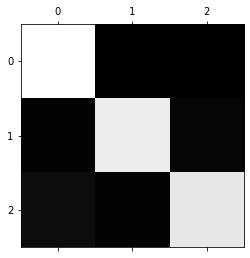

Normalized confusion matrix for training data:
 [[0.     0.     0.    ]
 [0.0125 0.     0.025 ]
 [0.05   0.0125 0.    ]] 



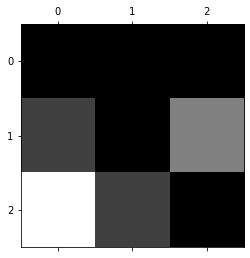

Confusion matrix for test data:
 [[28  0  4]
 [ 3 33  0]
 [ 2  5 30]] 



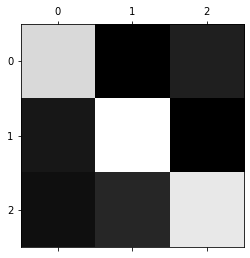

Normalized confusion matrix for test data:
 [[0.         0.         0.125     ]
 [0.08333333 0.         0.        ]
 [0.05405405 0.13513514 0.        ]] 



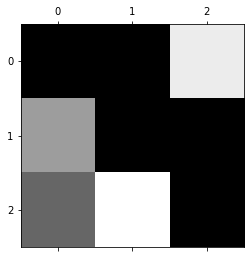

In [7]:
classifier_args = dict(random_state=42)

ocr = Model()
ocr.build_ocr_dataset(165)
ocr.shuffle_dataset_order()
ocr.split_dataset(0.3, 7)
ocr.train_classifier(classifier_args)

perf = Performance()
train_score = perf.cross_val_accuracy(ocr.clf, ocr.X_train, ocr.Y_train)
test_score = perf.cross_val_accuracy(ocr.clf, ocr.X_test, ocr.Y_test)

train_conf_mx = perf.calc_confusion_matrix(ocr.clf,
                                           ocr.X_train, ocr.Y_train)
test_conf_mx = perf.calc_confusion_matrix(ocr.clf,
                                          ocr.X_test, ocr.Y_test)

normalized_train_conf_mx = perf.normalize_confusion_matrix(train_conf_mx)
normalized_test_conf_mx = perf.normalize_confusion_matrix(test_conf_mx)

print("\n----Performance Measures----")
print("Cross-validation accuracy scores on training data:\n", train_score,
      "\n")
print("Cross-validation accuracy scores on test data:\n", test_score,
      "\n")

print("Confusion matrix for training data:\n", train_conf_mx, "\n")
perf.plot_confusion_matrix(train_conf_mx)
print("Normalized confusion matrix for training data:\n",
      normalized_train_conf_mx,
      "\n")
perf.plot_confusion_matrix(normalized_train_conf_mx)

print("Confusion matrix for test data:\n", test_conf_mx, "\n")
perf.plot_confusion_matrix(test_conf_mx)
print("Normalized confusion matrix for test data:\n",
      normalized_test_conf_mx,
      "\n")
perf.plot_confusion_matrix(normalized_test_conf_mx)


## Validating selected gestures

Name: usr_gest_03


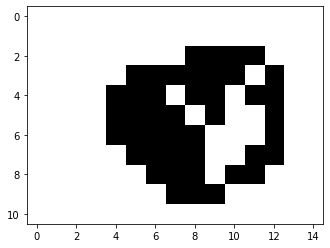

Number of black pixels: 44
Intensity of the rows: [0 0 4 7 7 6 6 6 5 3 0]
Intensity of the cols: [0 0 0 0 3 5 6 6 7 5 3 4 5 0 0]
Index of center of mass: (8, 5)
-------------------------

Name: usr_gest_01


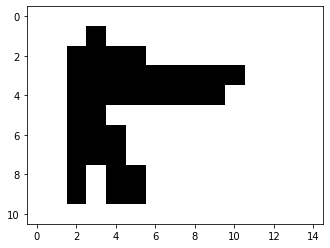

Number of black pixels: 36
Intensity of the rows: [0 1 4 9 8 2 3 3 3 3 0]
Intensity of the cols: [0 0 8 7 7 5 2 2 2 2 1 0 0 0 0]
Index of center of mass: (4, 5)
-------------------------

Name: usr_gest_02


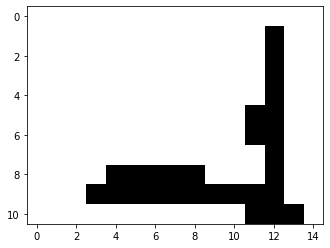

Number of black pixels: 28
Intensity of the rows: [ 0  1  1  1  1  2  2  1  6 10  3]
Intensity of the cols: [ 0  0  0  1  2  2  2  2  2  1  1  4 10  1  0]
Index of center of mass: (9, 7)
-------------------------

Comparing gestures and making scores:

usr_gest_03

Compared with usr_gest_01: 109 same pixels
Compared with usr_gest_02: 115 same pixels


Number of black pixels: 44
AVG number of black pixels in others: 32.0

Center of mass: (8, 5)
AVG Center of mass in others: [6.5 6. ]

---------

usr_gest_01

Compared with usr_gest_03: 109 same pixels
Compared with usr_gest_02: 109 same pixels


Number of black pixels: 36
AVG number of black pixels in others: 36.0

Center of mass: (4, 5)
AVG Center of mass in others: [8.5 6. ]

---------

usr_gest_02

Compared with usr_gest_03: 115 same pixels
Compared with usr_gest_01: 109 same pixels


Number of black pixels: 28
AVG number of black pixels in others: 40.0

Center of mass: (9, 7)
AVG Center of mass in others: [6. 5.]

---------



In [8]:
class NestedGesture(object):
    """
    Class representation of nested OCR-gestures
    """
    def __init__(self, image, name):
        """
        Initializing with stater gesture image
        :param image: The OCR-gesture image
        """
        self._image = image
        self._name = name

    def update_nested_image(self, image_to_nest):
        """
        Updating the nested image
        :param image_to_nest: Ocr-gesture image for nesting
        """
        self._image = np.minimum(self._image, image_to_nest)

    def calc_black_pixels(self):
        """
        Counting the black pixels on the nested image
        """
        self._n_black_pix = np.sum(self._image == 0)
        print('Number of black pixels:', self._n_black_pix)

    def calc_intensity_of_rows_cols(self):
        """
        Counting the black pixels by rows and collumns
        """
        self._rows_intensity_count = np.sum(self._image == 0, axis=1)
        self._cols_intensity_count = np.sum(self._image == 0, axis=0)
        print("Intensity of the rows:", self._rows_intensity_count)
        print("Intensity of the cols:", self._cols_intensity_count)

    def calc_center_of_mass(self):
        """
        Calculating the center of the mass (index)
        """
        h, w = self._image.shape
        weighted_row_average = np.average(range(1, h+1),
                                          weights=self._rows_intensity_count)
        weighted_col_average = np.average(range(1, w+1),
                                          weights=self._cols_intensity_count)
        a = np.uint8(np.around(weighted_col_average)-1)
        b = np.uint8(np.around(weighted_row_average)-1)
        self._center_of_mass_index = (a, b)
        print("Index of center of mass:", self._center_of_mass_index)

    @property
    def image(self):
        return self._image
    
    @property
    def name(self):
        return self._name

    @property
    def n_black_pix(self):
        return self._n_black_pix

    @property
    def rows_intensity_count(self):
        return self._rows_intensity_count

    @property
    def cols_intensity_count(self):
        return self._cols_intensity_count

    @property
    def center_of_mass_index(self):
        return self._center_of_mass_index


def read_gestures_from_file(source):
    """
    Reading gestures from file and making NestedGesture objects
    :param source: The source of the root folder of user-gestures
    :return: List of NestedGesture objects
    """
    nested_gesture_list = []
    usr_gest_list = os.listdir(source)

    for usr_gest in usr_gest_list:
        files = os.listdir(source+usr_gest)
        im = cv2.imread(source+usr_gest+"/"+files[0], 0)
        vars()[usr_gest] = NestedGesture(im, usr_gest)

        for i in range(len(files)):
            im = cv2.imread(source+usr_gest+"/"+files[i], 0)
            vars()[usr_gest].update_nested_image(im)
        nested_gesture_list.append(vars()[usr_gest])
    return nested_gesture_list


def analize_nested_gestures(nested_gesture_list):
    """
    Analising NestedGestures by differenct aspects
    :param nested_gesture_list: List of NestedGesture objects
    """
    for nested_gest in nested_gesture_list:
        print("Name: "+nested_gest.name)
        plt.imshow(cv2.cvtColor(nested_gest.image, cv2.COLOR_BGR2RGB))
        plt.show()
        nested_gest.calc_black_pixels()
        nested_gest.calc_intensity_of_rows_cols()
        nested_gest.calc_center_of_mass()
        print("-------------------------\n")


def compare_gestures(nested_gesture_list):

    for i in range(len(nested_gesture_list)):
        gesture = nested_gesture_list[i]
        print(gesture.name+"\n")

        other_gestures = np.delete(nested_gesture_list, i, axis=0)

        len_other_g = len(other_gestures)

        black_pixel_avg = []
        center_of_mass_avg = []

        for gest in other_gestures:
            black_pixel_avg.append(gest.n_black_pix)
            center_of_mass_avg.append(gest.center_of_mass_index)

            compare = gesture.image == gest.image
            compare_sum = np.sum(compare == True)

            print("Compared with "+gest.name+": "+str(compare_sum)+" same pixels")

        print("\n")

        black_pixel_avg = np.mean(black_pixel_avg)
        center_of_mass_avg = np.mean(center_of_mass_avg, axis=0)

        print("Number of black pixels: "+str(gesture.n_black_pix))
        print("AVG number of black pixels in others: "+str(black_pixel_avg)+"\n")
        print("Center of mass: "+str(gesture.center_of_mass_index))
        print("AVG Center of mass in others: "+str(center_of_mass_avg)+"\n")

        print("---------\n")

nested_gest_list = read_gestures_from_file("./usr_gest/")
analize_nested_gestures(nested_gest_list)
print("Comparing gestures and making scores:\n")
compare_gestures(nested_gest_list)